### Econ 176 APIs Day 2

We're back! [Here was Day 1](https://colab.research.google.com/drive/1laKhKCXTFtCAGKrOqQfisbGPyQE-xexm#scrollTo=nCAN5xmzEP9t&uniqifier=1)

<font size="-1">Today, we'll continue building familiarity with APIs through calling and analyzing the results (using Python, of course!)

#### Where were we?

We had tried the International Space Station API at [http://api.open-notify.org/iss-now.json](http://api.open-notify.org/iss-now.json) :

In [ ]:
# we assign the url and obtain the api-call result into result
#    Note that result will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
result

# if it succeeds, you should see <Response [200]>

<Response [200]>

In [ ]:
#
# In this case, we know the result is a JSON file, and we can obtain it that way:

json_contents = result.json()      # needs to convert the text to a json dictionary...
print(f"json_contents is {json_contents}")     # Aha!  Let's re/introduce f-strings...

# Take a look... remember that a json object is a Python dictionary:

json_contents is {'iss_position': {'longitude': '-163.3559', 'latitude': '13.0681'}, 'timestamp': 1738864779, 'message': 'success'}


In [ ]:
#
# Let's remind ourselves how dictionaries work:

lat = json_contents['iss_position']['latitude']
lat = float(lat)
print("lat: ", lat)

lat:  13.0681


Here is a function that returns the distance detween two (lat/long) pairs:


<font size="-2">

```   
def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    from math import *
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))
```
</font>

#### <font color="Coral"><b>Task 0</b></font> &nbsp;&nbsp; Let's, together, create a program that finds the distance from the ISS to Claremont
+ It can just be a cell, it doesn't have to be its own function.
+ But, let's definitely use the haversine function, above...





In [ ]:
#
# Let's make sure we "unpack the process" w/o AI
#
from math import *


def haversine(lat1, long1, lat2, long2):
    """
    Calculate the great circle distance in kilometers between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    long1, lat1, long2, lat2 = map(radians, [long1, lat1, long2, lat2])

    # haversine formula
    dlong = long2 - long1
    dlat = lat2 - lat1
    trig = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlong/2)**2
    # Radius of earth. Use 3956 for miles. 6371 for km.
    radius = 3956  # we'll use miles!
    return radius * 2 * asin(sqrt(trig))


url = "http://api.open-notify.org/iss-now.json"   # this is sometimes called an "endpoint" ...
result = requests.get(url)
json_contents = result.json()


iss_lat = float(json_contents['iss_position']['latitude'])
iss_long = float(json_contents['iss_position']['longitude'])

my_lat = 34.1063626
my_long = -117.7111075


haversine(iss_lat, iss_long, my_lat, my_long)

2747.960913873627

In [ ]:
#
# Then, let's compare with AI's result...
#

Vice-versa is ok, too...

<br>
<hr>
<br>

<b>Let's try another ISS "endpoint" ~ one with all of the <i>people</i> in space.</b>

It's at this url:  [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json)

In [ ]:
#
# we assign the url and use requests.get to obtain the result into result_astro
#
#    Remember, result_astro will be an object that contains many fields (not a simple string)
#

import requests

url = "http://api.open-notify.org/astros.json"   # this is sometimes called an "endpoint" ...
result_astro = requests.get(url)
result_astro

# if it succeeded, you should see <Response [200]>

<Response [200]>

In [ ]:
# If the request succeeded, we know the result is a JSON file, and we can obtain it that way.
# Let's call our dictionary something more specific:

astronauts = result_astro.json()
d = astronauts   # a shorter variable for convenience..


# Remember:  astronauts will be a _dictionary_
note = """ here's yesterday evening's result - it _should_ be the same this morning!

{"people": [{"craft": "ISS", "name": "Oleg Kononenko"}, {"craft": "ISS", "name": "Nikolai Chub"},
{"craft": "ISS", "name": "Tracy Caldwell Dyson"}, {"craft": "ISS", "name": "Matthew Dominick"},
{"craft": "ISS", "name": "Michael Barratt"}, {"craft": "ISS", "name": "Jeanette Epps"},
{"craft": "ISS", "name": "Alexander Grebenkin"}, {"craft": "ISS", "name": "Butch Wilmore"},
{"craft": "ISS", "name": "Sunita Williams"}, {"craft": "Tiangong", "name": "Econ176_Participant_6 Guangsu"},
{"craft": "Tiangong", "name": "Econ176_Participant_6 Cong"}, {"craft": "Tiangong", "name": "Ye Guangfu"}], "number": 12, "message": "success"}
"""
print(d)

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'}, {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


In [ ]:
d['people']

[{'craft': 'ISS', 'name': 'Oleg Kononenko'},
 {'craft': 'ISS', 'name': 'Nikolai Chub'},
 {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'},
 {'craft': 'ISS', 'name': 'Matthew Dominick'},
 {'craft': 'ISS', 'name': 'Michael Barratt'},
 {'craft': 'ISS', 'name': 'Jeanette Epps'},
 {'craft': 'ISS', 'name': 'Alexander Grebenkin'},
 {'craft': 'ISS', 'name': 'Butch Wilmore'},
 {'craft': 'ISS', 'name': 'Sunita Williams'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Guangsu'},
 {'craft': 'Tiangong', 'name': 'Econ176_Participant_6 Cong'},
 {'craft': 'Tiangong', 'name': 'Ye Guangfu'}]

This is pretty intricate!

Let's try unpacking this - _parsing it_ - with an in-class, break-out challenge...

#### <font color="Coral"><b>Task 1</b></font>: &nbsp;&nbsp; In-class break-out ...

<br>
<hr>
<br>

### Ok!  

#### You should add to your resume that
+ you have experience with traditional _web-scraping_
+ and with making - and interpreting - _API calls_
+ whether they convey plain-text or json-structured data...

<br>

Let's go deeper, to
+ see how the API "endpoints" themselves are implemented
+ see how parameters can be used in calling API endpoints
  + at least, with GET requests
  + POST requests are also common - that's for another day


### _Behind the Curtain_ of an API:

Let's watch _inside_ API calls, using CodeSandbox...

Specifically, let's practice using <u>parameters</u> to an API call:


### GET parameters

The GET request includes all of the information needed in the URL itself!

Here are a couple of images showing the _pieces_ of urls:

<img src="https://static.semrush.com/blog/uploads/media/ca/37/ca3737d8edb5cf079aaf1f11ae01d286/mMREmiwXSrryVyv8IxbVFgje7ICFhfqWnca7W0db36KjX35vzLTnStkFynEd9NBoXXH-JYKCm2deskxgLo_vxzEvl-qLpVOgtwc78rhFI2Rm1pBK-j2SwMKWz0CXU42STjzUVcF1vaRTFbw_6wvH_5A.webp">

#### Using query-string parameters

**Challenge!**

Team up with people nearby and make API calls to the endpoints

+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery0"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery1"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery2"`
+ `url = "https://fvcjsw-5000.csb.app/econ176_mystery3"`

_each_ of which uses query-string parameters
+ `x` (an integer) and
+ `y` (an integer)

and see if you can determine what each one is doing... and how the parameters are being used?!

<br>



In [ ]:
#
# Try it - from a browser or from here...

import requests

url = "https://fvcjsw-5000.csb.app/econ176_mystery0?x=0&y=0"    # perhaps try from browser first!
result_ft = requests.get(url)
# print(result_ft)              # prints the status_code

d = result_ft.json()            # here are the _contents_
d

# multiplication

{'answer': 0}

In [ ]:
#
# Try it - from a browser or from here...

import requests

url = "https://fvcjsw-5000.csb.app/econ176_mystery1?x=15&y=4"    # perhaps try from browser first!
result_ft = requests.get(url)
# print(result_ft)              # prints the status_code

d = result_ft.json()            # here are the _contents_
d


# if x odd, then y*2, if x even, then y

{'answer': 8}

We can create larger custom API calls, as well...

For example,

In [ ]:
#
# A larger API call to the same CodeSandbox server

import requests

url = "https://fvcjsw-5000.csb.app/fintech"    # try this from your browser first!
result_ft = requests.get(url)
result_ft

<Response [200]>

In [ ]:
#
# Let's view ... then parse and interpret!

d = result_ft.json()                  # try .text, as well...
print(f"The resulting data is {d}")

The resulting data is {'Number': 176, 'Initials': ['AC', 'AL', 'AN', 'AP', 'AZ', 'CL', 'CM', 'CW', 'CZ', 'DS', 'EC', 'ED', 'EG', 'ES', 'HV', 'IC', 'IG', 'JB', 'JN', 'JT', 'KR', 'LA', 'LG', 'LS', 'LW', 'MD', 'ND', 'NM', 'NV', 'NW', 'OB', 'RK', 'RL', 'RP', 'SB', 'SC', 'SD', 'SF', 'SS', 'TC', 'TS', 'VN', 'VVP', 'YM', 'ZD', 'ZY'], 'Departments': ['Econ', 'CS']}


'NW'

**Challenge**:   extract your initials from `d`   &nbsp;&nbsp; 😀


<b><font color="DodgerBlue">Hint</font></b>: &nbsp;&nbsp; Start with &nbsp;&nbsp;  ``d[ <something> ]``   &nbsp;&nbsp;   What's the ``something``?

<i>Only do one step at a time...</i>  &nbsp;&nbsp; This is key!

In [ ]:
#
# see if you can extract only your initials from d
d['Initials'][-17]

# we're not finished yet! :)

'NW'

<br>
<hr>
<br>

### Another API, now _finance-inspired_ ...

There are **lots** of finance APIs. I'm currently skeptical that they're materially different, though I'm happy to be convinced... .

One material difference is price! The kind folks at _Alphavantage_ have offered us an Econ176-specific set of API keys. Let's dive in!

Before using your key, try a demonostration call at this endpoint:

`https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo`

which, as ever, is this link:

[https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo](https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=demo)

You'll see that it's the last 100 days of information from IBM. To obtain other symbols' data - or other data - you'll need to use your API key. Notice that the demo url, above, has `demo` as the `apikey` (it only works for IBM 😀)

### Getting comfortable with documentation...

APIs come with widely varying documentation
+ sometimes you're guessing (as we did above!)
+ more often, they're documented... **but** the documentation tends to have lots of idiosynrasies (there's not as much standardization as one might hope on how these things are discussed, the computing languages presumed, etc.)

So, it's a worthy task - and challenge - to get familiar with the many kinds and conventions of documentation out there.

Take a look at the [Alphvantage documentation](https://www.alphavantage.co/documentation/):
+ specifically, find the section for the `TIME_SERIES_DAILY` function
+ read over the parameters
+ click on some of the examples
+ see if you can reconcile the outputs you're seeing with the parameters provided

Next, we'll try it out...

... and will determine the best "single-share" strategy for investing -- for your choice of stock -- over the past 100 days. <br> <font size="-2">(You might remember this as a cs5 homework, the ["TT Securities" problem](https://www.cs.hmc.edu/twiki/bin/view/CS5Fall2023/TTSecuritiesGold).)</font>

<br>
<hr>
<br>

### Your tasks!

**<font color="Coral">Part 1</font>: &nbsp;&nbsp; <font color="DodgerBlue">Single-share Analysis</font>** &nbsp; using TIME_SERIES_DAILY

So, your tasks include
+ get your API working - the first cell below will help
+ make sure you're getting data! - the second cell below will help with that!
+ choose another stock symbol
  + for now, let's stick with the compact data of the last 100 days
  + also, be sure to make _one_ call and then code-develop with that data
  + it will quickly annoy API providers if you make too many calls
  + there are automatic "shutoffs" to stop responding in this case...
  + it's not clear when the "shutoff" stops - possibly never

<br>

So, after making one call, explore the resulting data (dictionary) so that you
+ programmatically extract the 100 prices (let's use the **closing** price)
+ create a list with them
+ find the maximum and the minimum
  + also find the _date_ of the max and the _date_ of the min
  + be sure to print those out...
+ create a **graph** of your list &nbsp; (suggestion: use AI for graphing help)
  + get the AI to highlight the max and the min
+ "Single-share" analysis: &nbsp; Find the buy day and sell day that maximize `(sell price - buy price)`
  + make sure that you sell _at or after_ you buy...
+ print your results
+ re-graph your 100-day signal, and highlight the buy day and the sell day you just found
  + you might ask to use ``seaborn`` or ``matplotlib`` - both are libraries available in Colab (and libraries that the AI knows well)

<br>

Once you have a workflow that works, try it with a different stock symbol!
+ do the same thing for the other signal: print the best single-share strategy - and graph
+ compare the results in your overall reflection below
+ you could wrap the workflow pieces into a function that takes a stock symbol as input! (This is optional and cs-y.)

<br>

**<font color="Coral">Part 2</font>: &nbsp;&nbsp; <font color="DodgerBlue">Use and Analyze <u>another</u> Alphavantage API</font>** &nbsp; ... of your choice
+ Look over the left-hand column of APIs in the [Alphavantage documentation](https://www.alphavantage.co/documentation/)
+ Choose another API that seems interesting to you, then
+ Explore and tinker to successfully use it, then
+ Analyze a subset of the data from the resulting call, then
+ Share, briefly, what you found.
  + The analysis does not need to be involved. For example,
  + finding the max and min of a value is wonderful - and definitely enough
  + or, the average, or sum, or ... really anything,
  + as long as it means you've looked through each time step of the data-sequence received  <font size="-1">(not each piece of data, just each time step)</font>
+ <font color="Coral"><b>EC</b></font> Totally optional: <font size="-1">Find a function for comparing time-series trends, import it, and then use it to compare one of your stock prices with your _other_ Alphavantage signal. Report what you find! (up to +10%)</font>

<br>

Some of the other APIs that look especially interesting, at least to me:
+ News & Sentiments
+ Income Statement / Balance Sheet
+ GDP per capita
+ Exchange rates
+ Coffee!



<br>
<hr>
<br>

### Let's start!

In [ ]:
#
# Let's request!   Just using the demo, for now:

import requests

url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=MSFT&apikey=demo"    # demo version
result = requests.get(url)
result

<Response [200]>

In [ ]:
#
# Let's view ... then parse and interpret!

d = result.json()                       # probably _don't_ try .text here!
print(f"The resulting data's keys are {list(d.keys())}")

The resulting data's keys are ['Meta Data', 'Time Series (Daily)']


In [ ]:
#
# Let's look at all of the keys...

for k in d['Time Series (Daily)']:
    print(k)

# Aha! they are dates... let's create a function to compare two dates

2025-02-05
2025-02-04
2025-02-03
2025-01-31
2025-01-30
2025-01-29
2025-01-28
2025-01-27
2025-01-24
2025-01-23
2025-01-22
2025-01-21
2025-01-17
2025-01-16
2025-01-15
2025-01-14
2025-01-13
2025-01-10
2025-01-08
2025-01-07
2025-01-06
2025-01-03
2025-01-02
2024-12-31
2024-12-30
2024-12-27
2024-12-26
2024-12-24
2024-12-23
2024-12-20
2024-12-19
2024-12-18
2024-12-17
2024-12-16
2024-12-13
2024-12-12
2024-12-11
2024-12-10
2024-12-09
2024-12-06
2024-12-05
2024-12-04
2024-12-03
2024-12-02
2024-11-29
2024-11-27
2024-11-26
2024-11-25
2024-11-22
2024-11-21
2024-11-20
2024-11-19
2024-11-18
2024-11-15
2024-11-14
2024-11-13
2024-11-12
2024-11-11
2024-11-08
2024-11-07
2024-11-06
2024-11-05
2024-11-04
2024-11-01
2024-10-31
2024-10-30
2024-10-29
2024-10-28
2024-10-25
2024-10-24
2024-10-23
2024-10-22
2024-10-21
2024-10-18
2024-10-17
2024-10-16
2024-10-15
2024-10-14
2024-10-11
2024-10-10
2024-10-09
2024-10-08
2024-10-07
2024-10-04
2024-10-03
2024-10-02
2024-10-01
2024-09-30
2024-09-27
2024-09-26
2024-09-25

In [ ]:
#
# here is one way to make a list of all of the dates:

DATES = list(d['Time Series (Daily)'].keys())
DATES

# Notice, they're backwards!

['2025-02-05',
 '2025-02-04',
 '2025-02-03',
 '2025-01-31',
 '2025-01-30',
 '2025-01-29',
 '2025-01-28',
 '2025-01-27',
 '2025-01-24',
 '2025-01-23',
 '2025-01-22',
 '2025-01-21',
 '2025-01-17',
 '2025-01-16',
 '2025-01-15',
 '2025-01-14',
 '2025-01-13',
 '2025-01-10',
 '2025-01-08',
 '2025-01-07',
 '2025-01-06',
 '2025-01-03',
 '2025-01-02',
 '2024-12-31',
 '2024-12-30',
 '2024-12-27',
 '2024-12-26',
 '2024-12-24',
 '2024-12-23',
 '2024-12-20',
 '2024-12-19',
 '2024-12-18',
 '2024-12-17',
 '2024-12-16',
 '2024-12-13',
 '2024-12-12',
 '2024-12-11',
 '2024-12-10',
 '2024-12-09',
 '2024-12-06',
 '2024-12-05',
 '2024-12-04',
 '2024-12-03',
 '2024-12-02',
 '2024-11-29',
 '2024-11-27',
 '2024-11-26',
 '2024-11-25',
 '2024-11-22',
 '2024-11-21',
 '2024-11-20',
 '2024-11-19',
 '2024-11-18',
 '2024-11-15',
 '2024-11-14',
 '2024-11-13',
 '2024-11-12',
 '2024-11-11',
 '2024-11-08',
 '2024-11-07',
 '2024-11-06',
 '2024-11-05',
 '2024-11-04',
 '2024-11-01',
 '2024-10-31',
 '2024-10-30',
 '2024-10-

In [ ]:
#
# Let's flip the DATES around:
DATES.reverse()
DATES

# Yay!

['2024-09-12',
 '2024-09-13',
 '2024-09-16',
 '2024-09-17',
 '2024-09-18',
 '2024-09-19',
 '2024-09-20',
 '2024-09-23',
 '2024-09-24',
 '2024-09-25',
 '2024-09-26',
 '2024-09-27',
 '2024-09-30',
 '2024-10-01',
 '2024-10-02',
 '2024-10-03',
 '2024-10-04',
 '2024-10-07',
 '2024-10-08',
 '2024-10-09',
 '2024-10-10',
 '2024-10-11',
 '2024-10-14',
 '2024-10-15',
 '2024-10-16',
 '2024-10-17',
 '2024-10-18',
 '2024-10-21',
 '2024-10-22',
 '2024-10-23',
 '2024-10-24',
 '2024-10-25',
 '2024-10-28',
 '2024-10-29',
 '2024-10-30',
 '2024-10-31',
 '2024-11-01',
 '2024-11-04',
 '2024-11-05',
 '2024-11-06',
 '2024-11-07',
 '2024-11-08',
 '2024-11-11',
 '2024-11-12',
 '2024-11-13',
 '2024-11-14',
 '2024-11-15',
 '2024-11-18',
 '2024-11-19',
 '2024-11-20',
 '2024-11-21',
 '2024-11-22',
 '2024-11-25',
 '2024-11-26',
 '2024-11-27',
 '2024-11-29',
 '2024-12-02',
 '2024-12-03',
 '2024-12-04',
 '2024-12-05',
 '2024-12-06',
 '2024-12-09',
 '2024-12-10',
 '2024-12-11',
 '2024-12-12',
 '2024-12-13',
 '2024-12-

In [ ]:
# Oooh... Now let's see what's in each key (date)

d['Time Series (Daily)']['2025-01-21']  # Aha! it's a dictionary again!  We will need to index again!!

{'1. open': '430.2000',
 '2. high': '430.8999',
 '3. low': '425.5950',
 '4. close': '428.5000',
 '5. volume': '26085703'}

In [ ]:
# A small function to get the closing price on a date (date) using data (dictionary) d
def get_closing(date, d):
    close = float(d['Time Series (Daily)'][date]['4. close'])
    return close

In [ ]:
# A loop to find the minimum closing price
#

min_price = 10000000
min_key = "nothing"

for date in d['Time Series (Daily)']:
    closing =  get_closing(date, d)
    # print(f"date is {date} and closing is {closing}")
    if closing < min_price:
        min_price = closing
        min_price_date = date

print(f"min_price_date is {min_price_date} and {min_price = }")

min_price_date is 2024-10-31 and min_price = 406.35


#### Onward into the tasks, as listed above...
+ perhaps first, make sure you can repeat the above cells with a _different_ stock ticker
+ perhaps then create a **list** of all of the closing prices
+ from there, you're ready for the analysis + graphing...

In [3]:
api_key = ''

In [5]:
from google.colab import userdata
api_key = userdata.get('API_KEY')

# Part 1

Maximum closing price: 207.71 on 2025-02-04
Minimum closing price: 163.06 on 2024-10-09
Maximum profit: 37.5
Buy date: 2025-02-27
Sell date: 2025-02-04


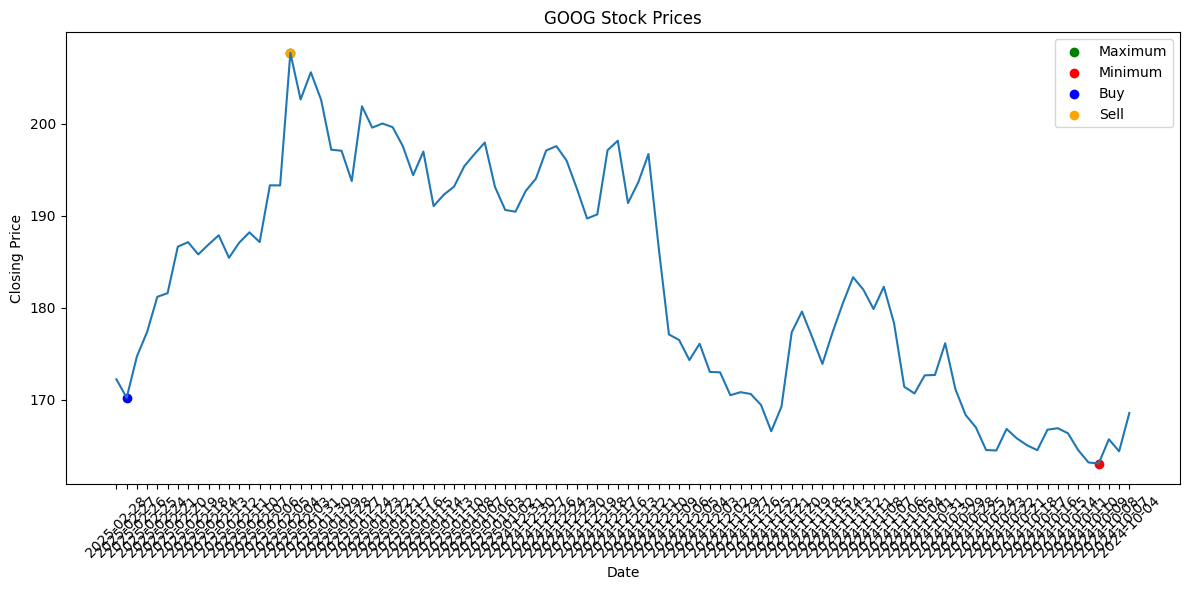

In [8]:
import requests


def single_share_analysis(symbol, api_key):


    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}"    # demo version
    result = requests.get(url)
    if result.status_code != 200:
        raise Exception(f"result.status_code = {result.status_code}")
    d = result.json()



    # prompt: find the maximum and the minimum
    # also find the date of the max and the date of the min
    # be sure to print those out...


    DATES = list(d['Time Series (Daily)'].keys())
    DATES.reverse()

    # programmatically extract the 100 prices (let's use the closing price)
    # create a list with them

    prices = []

    for date in d['Time Series (Daily)']:
        close = float(d['Time Series (Daily)'][date]['4. close'])
        prices.append((date, close))


    # Find the maximum and minimum closing prices and their corresponding dates
    max_price = -1
    min_price = float('inf')
    max_date = None
    min_date = None

    for date, price in prices:
        if price > max_price:
            max_price = price
            max_date = date
        if price < min_price:
            min_price = price
            min_date = date

    print(f"Maximum closing price: {max_price} on {max_date}")
    print(f"Minimum closing price: {min_price} on {min_date}")

    # Single-share analysis: Find the buy day and sell day that maximize profit
    max_profit = 0
    buy_date = None
    sell_date = None

    for i in range(len(prices)):
        for j in range(i, len(prices)):
            profit = prices[j][1] - prices[i][1]
            if profit > max_profit:
                max_profit = profit
                buy_date = prices[i][0]
                sell_date = prices[j][0]

    print(f"Maximum profit: {max_profit}")
    print(f"Buy date: {buy_date}")
    print(f"Sell date: {sell_date}")

    # Graphing (using matplotlib)
    import matplotlib.pyplot as plt

    dates = [date for date, price in prices]
    prices_only = [price for date, price in prices]

    plt.figure(figsize=(12, 6))
    plt.plot(dates, prices_only)
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.title(f"{symbol} Stock Prices")
    plt.xticks(rotation=45)

    # Highlight the maximum and minimum points
    plt.scatter(max_date, max_price, color='green', label='Maximum')
    plt.scatter(min_date, min_price, color='red', label='Minimum')
    plt.scatter(buy_date, prices_only[dates.index(buy_date)], color='blue', label='Buy')
    plt.scatter(sell_date, prices_only[dates.index(sell_date)], color='orange', label='Sell')


    plt.legend()
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()



single_share_analysis('GOOG', api_key)

Maximum closing price: 36.15 on 2024-10-24
Minimum closing price: 34.15 on 2024-11-12
Maximum profit: 2.0
Buy date: 2024-11-12
Sell date: 2024-10-24


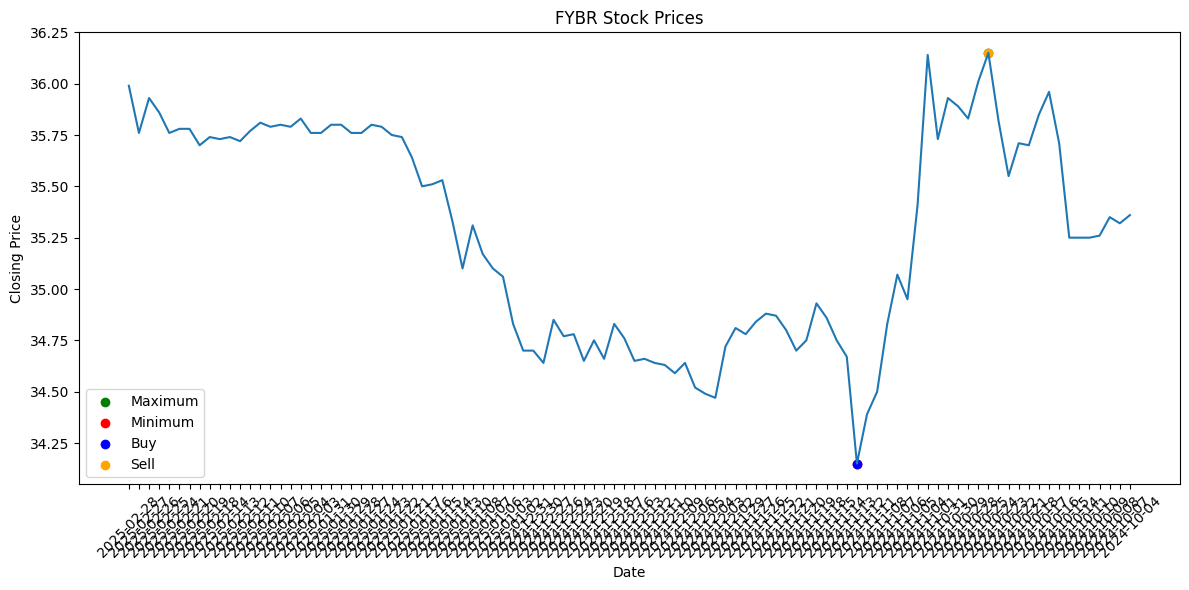

In [7]:
single_share_analysis('FYBR', api_key)

# Brainstorm Part 2
Sentiment vs price

https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers=AAPL&apikey=demo

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [ ]:
def get_stock_data(symbol, api_key, start_date=None):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error: status code {response.status_code}")
    data = response.json()

    # Convert the JSON data into a DataFrame
    time_series = data.get("Time Series (Daily)", {})
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    # Convert closing price to float
    df['close'] = df['4. close'].astype(float)

    # Filter by start_date if provided
    if start_date:
        start_date = pd.to_datetime(start_date)
        df = df[df.index >= start_date]

    return df[['close']]


# Example usage:
symbol = "NVDA"
start_date = "2022-04-01"
stock_df = get_stock_data(symbol, api_key, start_date)
# Adjust for stock split on 2024-06-10
split_date = pd.to_datetime("2024-06-10")
stock_df.loc[stock_df.index < split_date, 'close'] /= 10
stock_df


,close
2022-04-01,26.712
2022-04-04,27.360
2022-04-05,25.931
2022-04-06,24.407
2022-04-07,24.208
...,...
2025-02-21,134.430
2025-02-24,130.280
2025-02-25,126.630
2025-02-26,131.280


In [ ]:
# V2

import requests
from datetime import datetime, timedelta
import json
import os

# Define a cache file name
CACHE_FILE = 'sentiment_cache.json'

# Load existing cache if available, otherwise create an empty cache dictionary
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, 'r') as f:
        cache = json.load(f)
else:
    cache = {}

def get_sentiment_data_segment(symbol, time_from, time_to, api_key, sort='LATEST', limit="1000"):
    """
    Fetch sentiment data for a single time segment from time_from to time_to.
    Uses caching to avoid repeated API calls.
    """
    # Build a unique cache key based on the parameters
    cache_key = f"{symbol}_{time_from}_{time_to}_{sort}_{limit}"
    if cache_key in cache:
        print("Using cached data for:", cache_key)
        return cache[cache_key]

    # Build the URL using the provided documentation attributes:
    # - time_from and time_to in the format YYYYMMDDTHHMM
    # - sort parameter (default 'LATEST')
    # - limit parameter (default "1000")
    url = (f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}"
           f"&time_from={time_from}&time_to={time_to}&sort={sort}&limit={limit}&apikey={api_key}")
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error: status code {response.status_code}")

    sentiment_data = response.json()

    # Cache the result for future runs
    cache[cache_key] = sentiment_data
    with open(CACHE_FILE, 'w') as f:
        json.dump(cache, f)

    return sentiment_data

def get_sentiment_data(symbol, start_time, end_time, api_key, segment_hours=24, sort='LATEST', limit="1000"):
    """
    Loop over the time range from start_time to end_time in segments,
    fetching and appending sentiment data from each segment.

    Parameters:
      - symbol: Ticker symbol for filtering news
      - start_time: Start of the time range (YYYYMMDDTHHMM format)
      - end_time: End of the time range (YYYYMMDDTHHMM format)
      - api_key: Your API key for Alphavantage
      - segment_hours: The length of each segment in hours (default: 24)
      - sort: Sort order for the API (default: 'LATEST')
      - limit: Maximum number of articles per segment (default: "1000")

    Returns:
      A dictionary with combined sentiment data.
    """
    # Convert the provided start and end times into datetime objects
    start_dt = datetime.strptime(start_time, "%Y%m%dT%H%M")
    end_dt = datetime.strptime(end_time, "%Y%m%dT%H%M")
    all_feed = []

    current_from = start_dt
    while current_from < end_dt:
        current_to = current_from + timedelta(hours=segment_hours)
        if current_to > end_dt:
            current_to = end_dt

        # Convert back to string format required by the API
        time_from_str = current_from.strftime("%Y%m%dT%H%M")
        time_to_str = current_to.strftime("%Y%m%dT%H%M")
        print(f"Fetching sentiment data from {time_from_str} to {time_to_str}")

        segment_data = get_sentiment_data_segment(symbol, time_from_str, time_to_str, api_key, sort, limit)
        if "feed" in segment_data:
            all_feed.extend(segment_data["feed"])
        else:
            print("No feed data in segment:", time_from_str, "to", time_to_str)

        current_from = current_to

    # Combine the data from all segments into a single dictionary.
    # We also include the sentiment score and relevance definitions from the last segment fetched.
    combined_data = {
        "items": len(all_feed),
        "sentiment_score_definition": segment_data.get("sentiment_score_definition", ""),
        "relevance_score_definition": segment_data.get("relevance_score_definition", ""),
        "feed": all_feed
    }
    return combined_data

# Example usage:
# Define your API key, symbol, and desired time range:
symbol = "NVDA"
start_time = "20220410T0130"  # Example start time (YYYYMMDDTHHMM)
end_time = "20250214T2359"    # Example end time (YYYYMMDDTHHMM)

sentiment_data = get_sentiment_data(symbol, start_time, end_time, api_key, segment_hours=24)
print("Combined sentiment data items:", sentiment_data["items"])


Fetching sentiment data from 20220410T0130 to 20220411T0130
Using cached data for: NVDA_20220410T0130_20220411T0130_LATEST_1000
Fetching sentiment data from 20220411T0130 to 20220412T0130
Using cached data for: NVDA_20220411T0130_20220412T0130_LATEST_1000
Fetching sentiment data from 20220412T0130 to 20220413T0130
Using cached data for: NVDA_20220412T0130_20220413T0130_LATEST_1000
Fetching sentiment data from 20220413T0130 to 20220414T0130
Using cached data for: NVDA_20220413T0130_20220414T0130_LATEST_1000
Fetching sentiment data from 20220414T0130 to 20220415T0130
Using cached data for: NVDA_20220414T0130_20220415T0130_LATEST_1000
Fetching sentiment data from 20220415T0130 to 20220416T0130
Using cached data for: NVDA_20220415T0130_20220416T0130_LATEST_1000
Fetching sentiment data from 20220416T0130 to 20220417T0130
Using cached data for: NVDA_20220416T0130_20220417T0130_LATEST_1000
Fetching sentiment data from 20220417T0130 to 20220418T0130
Using cached data for: NVDA_20220417T0130_20

In [ ]:
import pandas as pd
from datetime import datetime

# Inspect main keys and number of feed items
print("Main keys in sentiment_data:", sentiment_data.keys())
print("Total number of feed items:", sentiment_data["items"])

# Convert the feed data into a DataFrame for easier analysis
feed_df = pd.DataFrame(sentiment_data["feed"])
print("\nFeed DataFrame head:")
print(feed_df.head())

# Convert 'time_published' to datetime format (extracting date portion)
def parse_time_published(time_str):
    # Assuming format "YYYYMMDDThhmmss"
    return datetime.strptime(time_str, "%Y%m%dT%H%M%S")

# Apply the conversion if the column exists
if 'time_published' in feed_df.columns:
    feed_df['datetime'] = feed_df['time_published'].apply(parse_time_published)
    feed_df['date'] = feed_df['datetime'].dt.date

    # Check the time range available in the feed data
    min_date = feed_df['datetime'].min()
    max_date = feed_df['datetime'].max()
    print("\nTime range in sentiment data:")
    print(f"From: {min_date} To: {max_date}")

    # Show basic sentiment statistics
    if 'overall_sentiment_score' in feed_df.columns:
        print("\nSentiment score stats:")
        print(feed_df['overall_sentiment_score'].describe())
else:
    print("No 'time_published' column found in the feed data.")

# At this point, feed_df should have a 'date' column that you can use to merge with the stock data.


Main keys in sentiment_data: dict_keys(['items', 'sentiment_score_definition', 'relevance_score_definition', 'feed'])
Total number of feed items: 38650

Feed DataFrame head:
                                               title  \
0      3 Creativity Software Stocks to Buy Right Now   
1  3 Unstoppable Growth Stocks to Buy for April  ...   
2          3 Powerful Stocks That Can Beat Inflation   
3  Elon Musk Asks If Twitter HQ Should Be Convert...   
4  Wall Street stumbles as surging Treasury yield...   

                                                 url   time_published  \
0  https://www.fool.com/investing/2022/04/10/3-cr...  20220410T150000   
1  https://www.fool.com/investing/2022/04/10/3-un...  20220410T114500   
2  https://www.fool.com/investing/2022/04/10/3-po...  20220410T110000   
3  https://www.benzinga.com/markets/cryptocurrenc...  20220410T055230   
4  https://www.moneycontrol.com/news/business/mar...  20220412T003120   

                                             autho

In [ ]:
# 7

# Aggregate sentiment data by date: average overall sentiment score per day
daily_sentiment = feed_df.groupby('date')['overall_sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'overall_sentiment_score': 'daily_sentiment'}, inplace=True)
print("Daily sentiment head:")
print(daily_sentiment.head())

# Check time range of aggregated sentiment data
print("Aggregated sentiment time range: {} to {}".format(daily_sentiment['date'].min(), daily_sentiment['date'].max()))


Daily sentiment head:
         date  daily_sentiment
0  2022-04-10         0.130966
1  2022-04-11        -0.102667
2  2022-04-12        -0.114156
3  2022-04-13        -0.012719
4  2022-04-14        -0.006477
Aggregated sentiment time range: 2022-04-10 to 2025-02-14


In [ ]:
# 8: Merge Stock Data with Daily Sentiment Data

# Convert daily_sentiment 'date' column to datetime (if not already)
daily_sentiment['date'] = pd.to_datetime(daily_sentiment['date'])

# Reset index for stock_df and ensure the 'date' column is datetime
stock_df_reset = stock_df.reset_index().rename(columns={'index': 'date'})
stock_df_reset['date'] = pd.to_datetime(stock_df_reset['date'])

# Merge on the 'date' column using a left join
merged_df = pd.merge(stock_df_reset, daily_sentiment, on='date', how='left')

# Fill missing sentiment values with forward fill, then backward fill as a safeguard
merged_df['daily_sentiment'] = merged_df['daily_sentiment'].ffill().bfill()

print("Merged DataFrame head after subsetting:")
print(merged_df.head())


Merged DataFrame head after subsetting:
        date   close  daily_sentiment
0 2022-04-01  26.712        -0.102667
1 2022-04-04  27.360        -0.102667
2 2022-04-05  25.931        -0.102667
3 2022-04-06  24.407        -0.102667
4 2022-04-07  24.208        -0.102667


In [ ]:
# 8.5 get excess return

symbol = "SPY"
start_date = "2022-04-01"
index_df = get_stock_data(symbol, api_key, start_date)
# Reset index for index_df and ensure the 'date' column is datetime
index_df_reset = index_df.reset_index().rename(columns={'index': 'date'})
index_df_reset['date'] = pd.to_datetime(index_df_reset['date'])
index_df



,close
2022-04-01,452.92
2022-04-04,456.80
2022-04-05,451.03
2022-04-06,446.52
2022-04-07,448.77
...,...
2025-02-21,599.94
2025-02-24,597.21
2025-02-25,594.24
2025-02-26,594.54


In [ ]:
# 9 v2
# 9: Compute Daily Returns, Excess Returns, and Sentiment Derivative

# --- For the stock ---
# Ensure merged_df is sorted by date and compute the stock's daily return
merged_df = merged_df.sort_values('date')
merged_df['return'] = merged_df['close'].pct_change()
merged_df = merged_df.dropna(subset=['return'])  # Remove first row with NaN return

print("Merged DataFrame with stock returns:")
print(merged_df.head())

# --- For the index (SPY) ---
# Ensure index_df_reset is sorted by date and compute SPY's daily return
index_df_reset = index_df_reset.sort_values('date')
index_df_reset['index_return'] = index_df_reset['close'].pct_change()
index_df_reset = index_df_reset.dropna(subset=['index_return'])

print("\nIndex DataFrame with returns:")
print(index_df_reset.head())

# --- Merge stock data with index data on 'date' ---
# We use an inner join to keep only dates that exist in both datasets.
merged_all = pd.merge(merged_df, index_df_reset[['date', 'index_return']], on='date', how='inner')

# --- Calculate Excess Return ---
# Excess Return = Stock Return - Index Return
merged_all['excess_return'] = merged_all['return'] - merged_all['index_return']

# --- Calculate the derivative (change) of sentiment over time ---
# This is simply the daily difference in the aggregated sentiment value.
merged_all = merged_all.sort_values('date')
merged_all['sentiment_change'] = merged_all['daily_sentiment'].diff()
merged_all = merged_all.dropna(subset=['sentiment_change'])  # Drop first row with NaN sentiment change

print("\nMerged DataFrame with Excess Returns and Sentiment Change:")
print(merged_all.head())

merged_all

Merged DataFrame with stock returns:
        date   close  daily_sentiment    return
2 2022-04-05  25.931        -0.102667 -0.052230
3 2022-04-06  24.407        -0.102667 -0.058771
4 2022-04-07  24.208        -0.102667 -0.008153
5 2022-04-08  23.119        -0.102667 -0.044985
6 2022-04-11  21.917        -0.102667 -0.051992

Index DataFrame with returns:
        date   close  index_return
2 2022-04-05  451.03     -0.012631
3 2022-04-06  446.52     -0.009999
4 2022-04-07  448.77      0.005039
5 2022-04-08  447.57     -0.002674
6 2022-04-11  439.92     -0.017092

Merged DataFrame with Excess Returns and Sentiment Change:
        date   close  daily_sentiment    return  index_return  excess_return  \
1 2022-04-06  24.407        -0.102667 -0.058771     -0.009999      -0.048772   
2 2022-04-07  24.208        -0.102667 -0.008153      0.005039      -0.013192   
3 2022-04-08  23.119        -0.102667 -0.044985     -0.002674      -0.042311   
4 2022-04-11  21.917        -0.102667 -0.051992     -0

,date,close,daily_sentiment,return,index_return,excess_return,sentiment_change
1,2022-04-06,24.407,-0.102667,-0.058771,-0.009999,-0.048772,0.000000
2,2022-04-07,24.208,-0.102667,-0.008153,0.005039,-0.013192,0.000000
3,2022-04-08,23.119,-0.102667,-0.044985,-0.002674,-0.042311,0.000000
4,2022-04-11,21.917,-0.102667,-0.051992,-0.017092,-0.034900,0.000000
5,2022-04-12,21.504,-0.114156,-0.018844,-0.003705,-0.015139,-0.011488
...,...,...,...,...,...,...,...
722,2025-02-21,134.430,0.190642,-0.040540,-0.017104,-0.023435,0.000000
723,2025-02-24,130.280,0.190642,-0.030871,-0.004550,-0.026321,0.000000
724,2025-02-25,126.630,0.190642,-0.028017,-0.004973,-0.023043,0.000000
725,2025-02-26,131.280,0.190642,0.036721,0.000505,0.036216,0.000000


from matplotlib import pyplot as plt
merged_all['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_all['daily_sentiment'].plot(kind='hist', bins=20, title='daily_sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_all['return'].plot(kind='hist', bins=20, title='return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_all['index_return'].plot(kind='hist', bins=20, title='index_return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_all.plot(kind='scatter', x='close', y='daily_sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_all.plot(kind='scatter', x='daily_sentiment', y='return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_all.plot(kind='scatter', x='return', y='index_return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
merged_all.plot(kind='scatter', x='index_return', y='excess_return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_all.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['daily_sentiment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_all.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('daily_sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['return']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_all.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('return')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['index_return']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = merged_all.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('index_return')

from matplotlib import pyplot as plt
merged_all['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged_all['daily_sentiment'].plot(kind='line', figsize=(8, 4), title='daily_sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged_all['return'].plot(kind='line', figsize=(8, 4), title='return')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
merged_all['index_return'].plot(kind='line', figsize=(8, 4), title='index_return')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['close'].plot(kind='hist', bins=20, title='close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['daily_sentiment'].plot(kind='hist', bins=20, title='daily_sentiment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['return'].plot(kind='hist', bins=20, title='return')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='close', y='daily_sentiment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='daily_sentiment', y='return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='return', y='index_return', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['close']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('close')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['daily_sentiment']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('daily_sentiment')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['return']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('return')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['index_return']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('index_return')

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['close'].plot(kind='line', figsize=(8, 4), title='close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['daily_sentiment'].plot(kind='line', figsize=(8, 4), title='daily_sentiment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['return'].plot(kind='line', figsize=(8, 4), title='return')
plt.gca().spines[['top', 'right']].set_visible(False)

Correlation matrix:
                  daily_sentiment  sentiment_change    return  index_return  \
daily_sentiment          1.000000          0.267670  0.155686      0.142651   
sentiment_change         0.267670          1.000000  0.209910      0.185631   
return                   0.155686          0.209910  1.000000      0.689919   
index_return             0.142651          0.185631  0.689919      1.000000   
excess_return            0.136590          0.186680  0.962343      0.467158   

                  excess_return  
daily_sentiment        0.136590  
sentiment_change       0.186680  
return                 0.962343  
index_return           0.467158  
excess_return          1.000000  


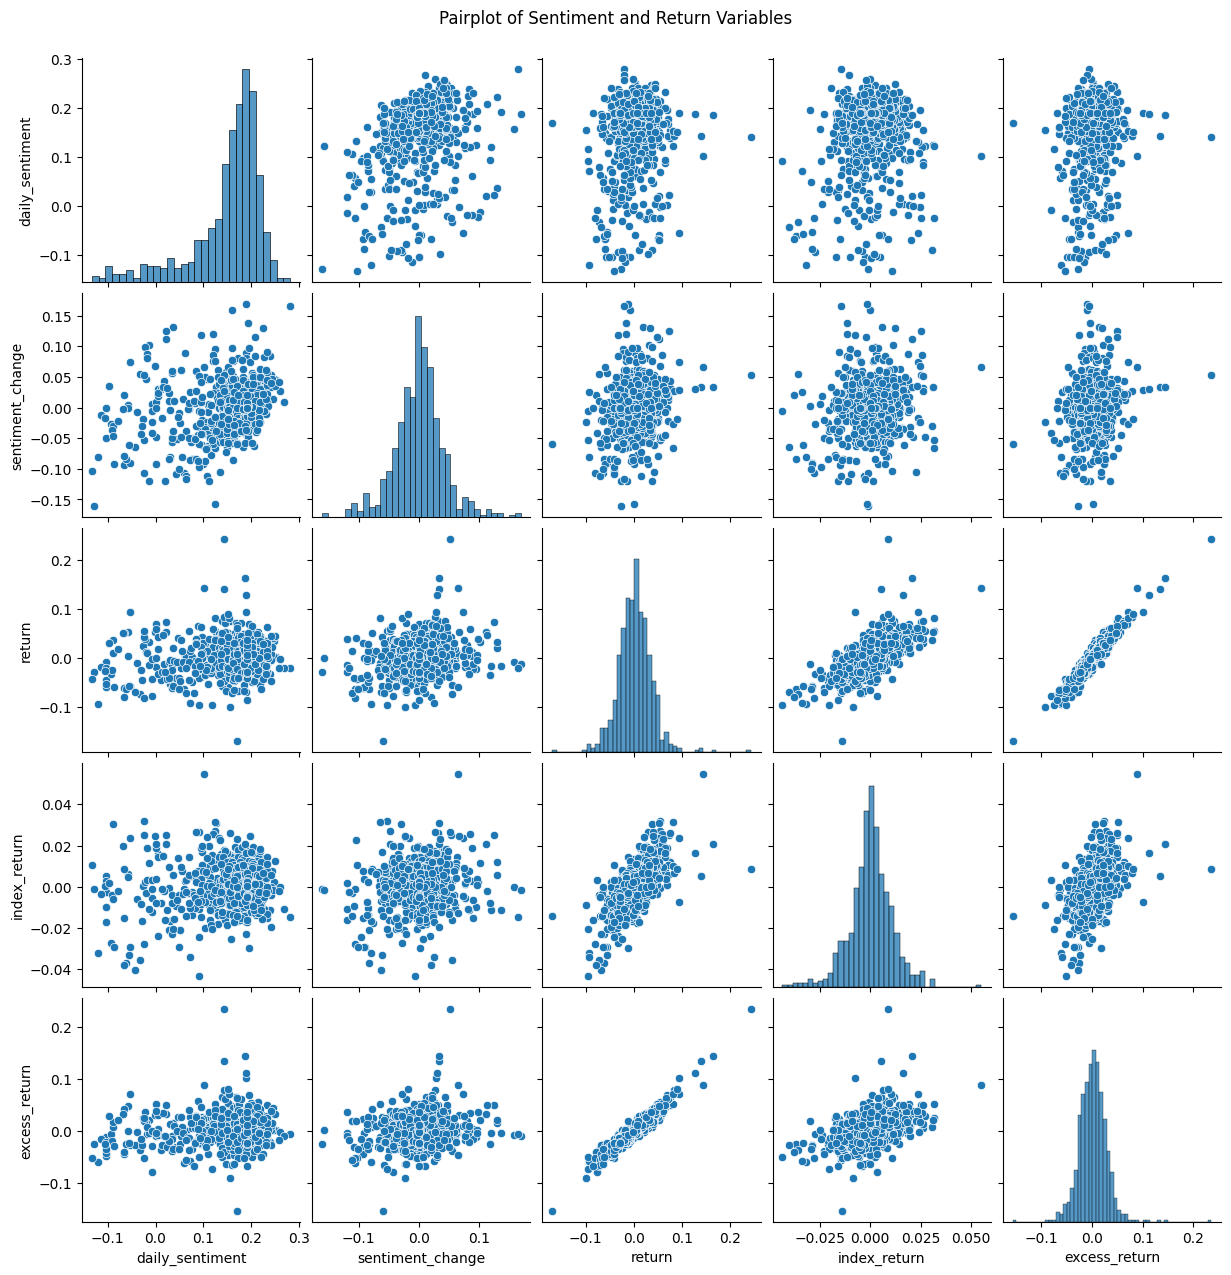

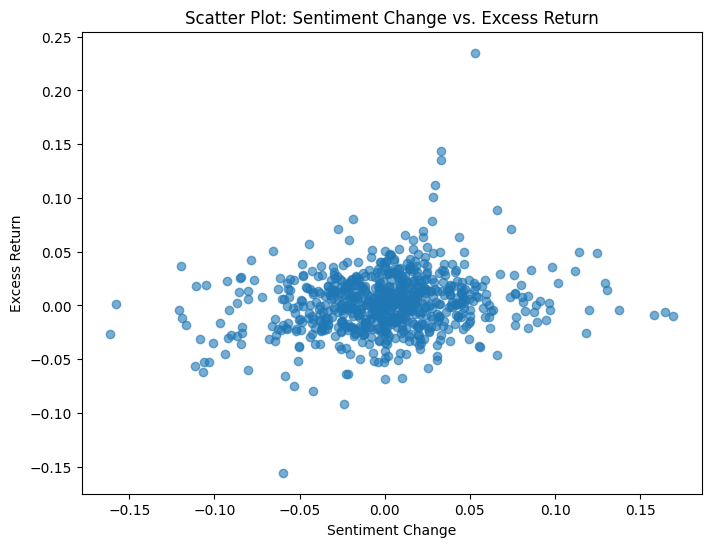

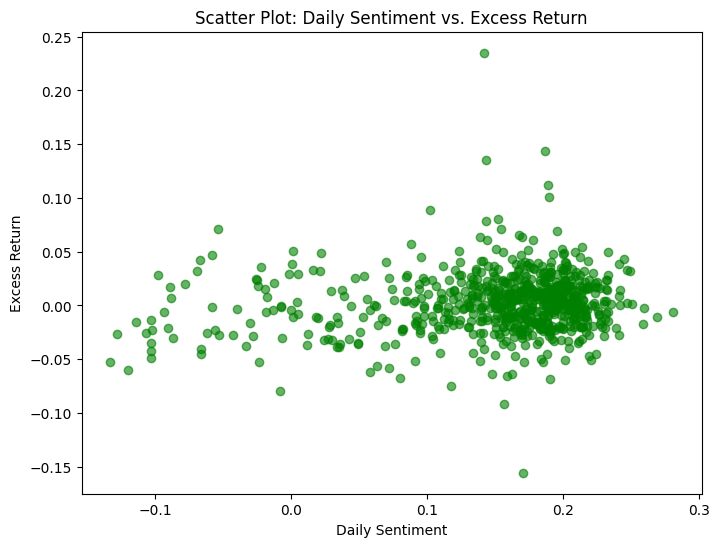

In [ ]:
# explore 10 v2

# 10: Exploratory Analysis of Relationships Between Variables

import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables of interest
vars_of_interest = merged_all[['daily_sentiment', 'sentiment_change', 'return', 'index_return', 'excess_return']]

# Print the correlation matrix
print("Correlation matrix:")
print(vars_of_interest.corr())

# Create a pairplot to visualize relationships between variables
sns.pairplot(vars_of_interest)
plt.suptitle("Pairplot of Sentiment and Return Variables", y=1.02)
plt.show()

# Scatter plot: sentiment_change vs. excess_return
plt.figure(figsize=(8, 6))
plt.scatter(merged_all['sentiment_change'], merged_all['excess_return'], alpha=0.6)
plt.xlabel("Sentiment Change")
plt.ylabel("Excess Return")
plt.title("Scatter Plot: Sentiment Change vs. Excess Return")
plt.show()

# Scatter plot: daily_sentiment vs. excess_return
plt.figure(figsize=(8, 6))
plt.scatter(merged_all['daily_sentiment'], merged_all['excess_return'], alpha=0.6, color='green')
plt.xlabel("Daily Sentiment")
plt.ylabel("Excess Return")
plt.title("Scatter Plot: Daily Sentiment vs. Excess Return")
plt.show()


Mean Squared Error: 0.0007944654565461048
R-squared: 0.018656746505333666
Coefficient: 0.052486597993581845
Intercept: -0.005560571511258626


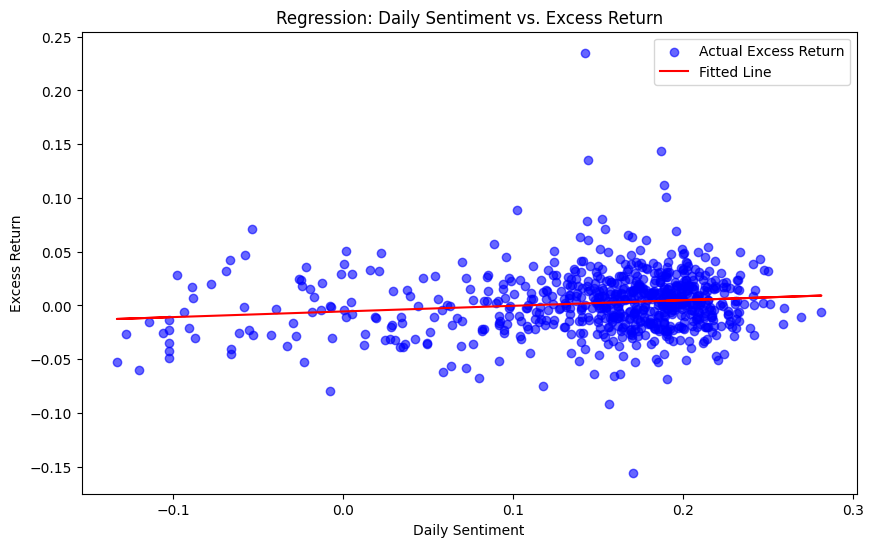

In [ ]:
# 11 v2: Regression Analysis: Daily Sentiment vs. Excess Return

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the features (X) and target (y)
X = merged_all[['daily_sentiment']].values  # Predictor: daily sentiment
y = merged_all['excess_return'].values      # Target: excess return

# Build and fit the regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Make predictions
y_pred = reg_model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficient:", reg_model.coef_[0])
print("Intercept:", reg_model.intercept_)

# Plot scatter plot with regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_all['daily_sentiment'], y, color='blue', alpha=0.6, label='Actual Excess Return')
plt.plot(merged_all['daily_sentiment'], y_pred, color='red', label='Fitted Line')
plt.xlabel("Daily Sentiment")
plt.ylabel("Excess Return")
plt.title("Regression: Daily Sentiment vs. Excess Return")
plt.legend()
plt.show()


In [ ]:
# 9: Compute Daily Returns

# If daily returns haven't been computed, calculate percentage change for 'close'
# If returns already exist in stock_df, ensure they are included. Otherwise, calculate here:
merged_df = merged_df.sort_values('date')  # Ensure data is sorted by date
merged_df['return'] = merged_df['close'].pct_change()
merged_df = merged_df.dropna(subset=['return'])  # Remove the first row with NaN return

# Display the first few rows to confirm the 'return' column
print("Merged DataFrame with returns:")
merged_df



Merged DataFrame with returns:


,date,close,daily_sentiment,return
1,2022-04-04,27.360,-0.102667,0.024259
2,2022-04-05,25.931,-0.102667,-0.052230
3,2022-04-06,24.407,-0.102667,-0.058771
4,2022-04-07,24.208,-0.102667,-0.008153
5,2022-04-08,23.119,-0.102667,-0.044985
...,...,...,...,...
724,2025-02-21,134.430,0.190642,-0.040540
725,2025-02-24,130.280,0.190642,-0.030871
726,2025-02-25,126.630,0.190642,-0.028017
727,2025-02-26,131.280,0.190642,0.036721


In [ ]:
# 10?: Compute Cumulative Values and Inspect Sample Data

# Ensure data is sorted by date
merged_df = merged_df.sort_values('date')

# Compute cumulative return (starting with an initial value of 1)
merged_df['cum_return'] = (1 + merged_df['return']).cumprod()

# Compute cumulative sentiment as the cumulative sum of daily sentiment
merged_df['cum_sentiment'] = merged_df['daily_sentiment'].cumsum()

# Output sample data points
print("First 10 rows:")
print(merged_df[['date', 'close', 'return', 'cum_return', 'daily_sentiment', 'cum_sentiment']].head(10))

print("\nLast 10 rows:")
print(merged_df[['date', 'close', 'return', 'cum_return', 'daily_sentiment', 'cum_sentiment']].tail(10))


First 10 rows:
         date   close    return  cum_return  daily_sentiment  cum_sentiment
1  2022-04-04  27.360  0.024259    1.024259        -0.102667      -0.102667
2  2022-04-05  25.931 -0.052230    0.970762        -0.102667      -0.205335
3  2022-04-06  24.407 -0.058771    0.913709        -0.102667      -0.308002
4  2022-04-07  24.208 -0.008153    0.906259        -0.102667      -0.410670
5  2022-04-08  23.119 -0.044985    0.865491        -0.102667      -0.513337
6  2022-04-11  21.917 -0.051992    0.820493        -0.102667      -0.616005
7  2022-04-12  21.504 -0.018844    0.805031        -0.114156      -0.730161
8  2022-04-13  22.203  0.032506    0.831199        -0.012719      -0.742879
9  2022-04-14  21.258 -0.042562    0.795822        -0.006477      -0.749357
10 2022-04-18  21.783  0.024697    0.815476        -0.025919      -0.775276

Last 10 rows:
          date   close    return  cum_return  daily_sentiment  cum_sentiment
719 2025-02-13  135.29  0.031646    5.064765         0.18

In [ ]:
# 10: Dual-Axis Plot for Cumulative Return and Cumulative Sentiment

import matplotlib.pyplot as plt

# Create a dual-axis plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot cumulative return on the left y-axis
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Return', color=color)
ax1.plot(merged_df['date'], merged_df['cum_return'], color=color, label='Cumulative Return')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for cumulative sentiment
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Sentiment', color=color)
ax2.plot(merged_df['date'], merged_df['cum_sentiment'], color=color, label='Cumulative Sentiment')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title("Cumulative Return and Cumulative Sentiment Over Time")
plt.xticks(rotation=45)
plt.show()

# Output sample cumulative values for inspection
print("Sample cumulative values:")
print(merged_df[['date', 'cum_return', 'cum_sentiment']].tail(10))


Sample cumulative values:
          date  cum_return  cum_sentiment
719 2025-02-13    5.064765     106.757920
720 2025-02-14    5.198038     106.948562
721 2025-02-18    5.218628     107.139204
722 2025-02-19    5.212264     107.329846
723 2025-02-20    5.245208     107.520489
724 2025-02-21    5.032570     107.711131
725 2025-02-24    4.877209     107.901773
726 2025-02-25    4.740566     108.092415
727 2025-02-26    4.914645     108.283058
728 2025-02-27    4.497978     108.473700


Mean Squared Error: 0.0011792964318617977
R-squared: 0.02476731925952702
Coefficient: 0.0728578411523294
Intercept: -0.008189849459794118


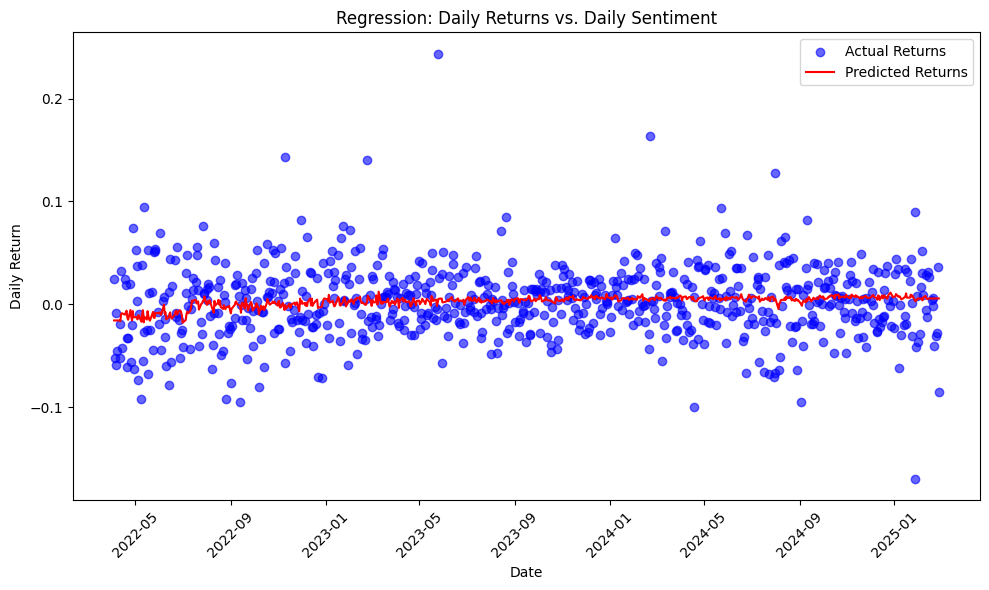

In [ ]:

# Prepare the features (X) and target (y) for regression
X = merged_df[['daily_sentiment']].values  # Predictor: daily sentiment
y = merged_df['return'].values              # Target: daily stock return

# Build the regression model using LinearRegression from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot the actual vs predicted returns over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['date'], y, color='blue', label='Actual Returns', alpha=0.6)
plt.plot(merged_df['date'], y_pred, color='red', label='Predicted Returns')
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.title("Regression: Daily Returns vs. Daily Sentiment")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Part 2

This notebook retrieves stock data and sentiment data, processes the data, and then performs a regression analysis to study the relationship between daily sentiment and daily stock returns.


In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta
import json
import os

%matplotlib inline


In [ ]:
def get_stock_data(symbol, api_key, start_date=None):
    url = f"https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&outputsize=full&symbol={symbol}&apikey={api_key}"
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error: status code {response.status_code}")
    data = response.json()

    # Convert the JSON data into a DataFrame
    time_series = data.get("Time Series (Daily)", {})
    df = pd.DataFrame.from_dict(time_series, orient='index')
    df.index = pd.to_datetime(df.index)
    df = df.sort_index()

    # Convert closing price to float
    df['close'] = df['4. close'].astype(float)

    # Filter by start_date if provided
    if start_date:
        start_date = pd.to_datetime(start_date)
        df = df[df.index >= start_date]

    return df[['close']]


In [ ]:
# Example usage for stock data:
symbol = "NVDA"
start_date = "2022-04-01"
stock_df = get_stock_data(symbol, api_key, start_date)

# Adjust for stock split on 2024-06-10
split_date = pd.to_datetime("2024-06-10")
stock_df.loc[stock_df.index < split_date, 'close'] /= 10

stock_df


,close
2022-04-01,26.712
2022-04-04,27.360
2022-04-05,25.931
2022-04-06,24.407
2022-04-07,24.208
...,...
2025-02-21,134.430
2025-02-24,130.280
2025-02-25,126.630
2025-02-26,131.280


In [ ]:
# Define cache file for sentiment data
CACHE_FILE = 'sentiment_cache.json'

# Load cache if available; otherwise, create an empty cache
if os.path.exists(CACHE_FILE):
    with open(CACHE_FILE, 'r') as f:
        cache = json.load(f)
else:
    cache = {}

def get_sentiment_data_segment(symbol, time_from, time_to, api_key, sort='LATEST', limit="1000"):
    """
    Fetch sentiment data for a single time segment from time_from to time_to.
    Uses caching to avoid repeated API calls.
    """
    cache_key = f"{symbol}_{time_from}_{time_to}_{sort}_{limit}"
    if cache_key in cache:
        print("Using cached data for:", cache_key)
        return cache[cache_key]

    url = (f"https://www.alphavantage.co/query?function=NEWS_SENTIMENT&tickers={symbol}"
           f"&time_from={time_from}&time_to={time_to}&sort={sort}&limit={limit}&apikey={api_key}")
    response = requests.get(url)
    if response.status_code != 200:
        raise Exception(f"Error: status code {response.status_code}")

    sentiment_data = response.json()

    cache[cache_key] = sentiment_data
    with open(CACHE_FILE, 'w') as f:
        json.dump(cache, f)

    return sentiment_data

def get_sentiment_data(symbol, start_time, end_time, api_key, segment_hours=24, sort='LATEST', limit="1000"):
    """
    Loop over the time range from start_time to end_time in segments,
    fetching and appending sentiment data from each segment.
    """
    start_dt = datetime.strptime(start_time, "%Y%m%dT%H%M")
    end_dt = datetime.strptime(end_time, "%Y%m%dT%H%M")
    all_feed = []

    current_from = start_dt
    while current_from < end_dt:
        current_to = current_from + timedelta(hours=segment_hours)
        if current_to > end_dt:
            current_to = end_dt

        time_from_str = current_from.strftime("%Y%m%dT%H%M")
        time_to_str = current_to.strftime("%Y%m%dT%H%M")
        print(f"Fetching sentiment data from {time_from_str} to {time_to_str}")

        segment_data = get_sentiment_data_segment(symbol, time_from_str, time_to_str, api_key, sort, limit)
        if "feed" in segment_data:
            all_feed.extend(segment_data["feed"])
        else:
            print("No feed data in segment:", time_from_str, "to", time_to_str)

        current_from = current_to

    combined_data = {
        "items": len(all_feed),
        "sentiment_score_definition": segment_data.get("sentiment_score_definition", ""),
        "relevance_score_definition": segment_data.get("relevance_score_definition", ""),
        "feed": all_feed
    }
    return combined_data


In [ ]:
# Example usage for sentiment data:
symbol = "NVDA"
start_time = "20220410T0130"  # Format: YYYYMMDDTHHMM
end_time = "20250214T2359"    # Format: YYYYMMDDTHHMM

sentiment_data = get_sentiment_data(symbol, start_time, end_time, api_key, segment_hours=24)
print("Combined sentiment data items:", sentiment_data["items"])


Fetching sentiment data from 20220410T0130 to 20220411T0130
Using cached data for: NVDA_20220410T0130_20220411T0130_LATEST_1000
Fetching sentiment data from 20220411T0130 to 20220412T0130
Using cached data for: NVDA_20220411T0130_20220412T0130_LATEST_1000
Fetching sentiment data from 20220412T0130 to 20220413T0130
Using cached data for: NVDA_20220412T0130_20220413T0130_LATEST_1000
Fetching sentiment data from 20220413T0130 to 20220414T0130
Using cached data for: NVDA_20220413T0130_20220414T0130_LATEST_1000
Fetching sentiment data from 20220414T0130 to 20220415T0130
Using cached data for: NVDA_20220414T0130_20220415T0130_LATEST_1000
Fetching sentiment data from 20220415T0130 to 20220416T0130
Using cached data for: NVDA_20220415T0130_20220416T0130_LATEST_1000
Fetching sentiment data from 20220416T0130 to 20220417T0130
Using cached data for: NVDA_20220416T0130_20220417T0130_LATEST_1000
Fetching sentiment data from 20220417T0130 to 20220418T0130
Using cached data for: NVDA_20220417T0130_20

In [ ]:
# Cell 7 – Aggregate and Merge Sentiment with Stock Data

if 'time_published' in feed_df.columns:
    feed_df['time_published'] = pd.to_datetime(feed_df['time_published'])
    feed_df['date'] = feed_df['time_published'].dt.date
else:
    raise KeyError("Column 'time_published' not found in feed_df.")

# Aggregate sentiment data by date: average overall sentiment score per day
daily_sentiment = feed_df.groupby('date')['overall_sentiment_score'].mean().reset_index()
daily_sentiment.rename(columns={'overall_sentiment_score': 'daily_sentiment'}, inplace=True)
print("Daily sentiment head:")
print(daily_sentiment.head())

print("Aggregated sentiment time range: {} to {}".format(daily_sentiment['date'].min(), daily_sentiment['date'].max()))

# Merge with stock data:
# Convert stock_df index to a date column matching the format in daily_sentiment
stock_df_reset = stock_df.reset_index().rename(columns={'index': 'date'})
stock_df_reset['date'] = pd.to_datetime(stock_df_reset['date']).dt.date

merged_df = pd.merge(stock_df_reset, daily_sentiment, on='date', how='left')

# Fill missing sentiment values with forward fill, then backward fill as a safeguard
merged_df['daily_sentiment'] = merged_df['daily_sentiment'].ffill().bfill()

print("Merged DataFrame head after subsetting:")
print(merged_df.head())


Daily sentiment head:
         date  daily_sentiment
0  2022-04-10         0.130966
1  2022-04-11        -0.102667
2  2022-04-12        -0.114156
3  2022-04-13        -0.012719
4  2022-04-14        -0.006477
Aggregated sentiment time range: 2022-04-10 to 2025-02-14
Merged DataFrame head after subsetting:
         date   close  daily_sentiment
0  2022-04-01  26.712        -0.102667
1  2022-04-04  27.360        -0.102667
2  2022-04-05  25.931        -0.102667
3  2022-04-06  24.407        -0.102667
4  2022-04-07  24.208        -0.102667


In [ ]:
# 8

# Get index data for symbol "SPY"
symbol_index = "SPY"
index_df = get_stock_data(symbol_index, api_key, start_date)
index_df_reset = index_df.reset_index().rename(columns={'index': 'date'})
index_df_reset['date'] = pd.to_datetime(index_df_reset['date'])

# Display the index data DataFrame
index_df


,close
2022-04-01,452.92
2022-04-04,456.80
2022-04-05,451.03
2022-04-06,446.52
2022-04-07,448.77
...,...
2025-02-21,599.94
2025-02-24,597.21
2025-02-25,594.24
2025-02-26,594.54


In [ ]:
# 9

# Sort merged data by date and compute percentage change in 'close'
merged_df = merged_df.sort_values('date')
merged_df['return'] = merged_df['close'].pct_change()
merged_df = merged_df.dropna(subset=['return'])

print("Merged DataFrame with returns:")
print(merged_df.head())


Merged DataFrame with returns:
         date   close  daily_sentiment    return
1  2022-04-04  27.360        -0.102667  0.024259
2  2022-04-05  25.931        -0.102667 -0.052230
3  2022-04-06  24.407        -0.102667 -0.058771
4  2022-04-07  24.208        -0.102667 -0.008153
5  2022-04-08  23.119        -0.102667 -0.044985


Mean Squared Error: 0.0011792964318617977
R-squared: 0.02476731925952702
Coefficient: 0.0728578411523294
Intercept: -0.008189849459794118


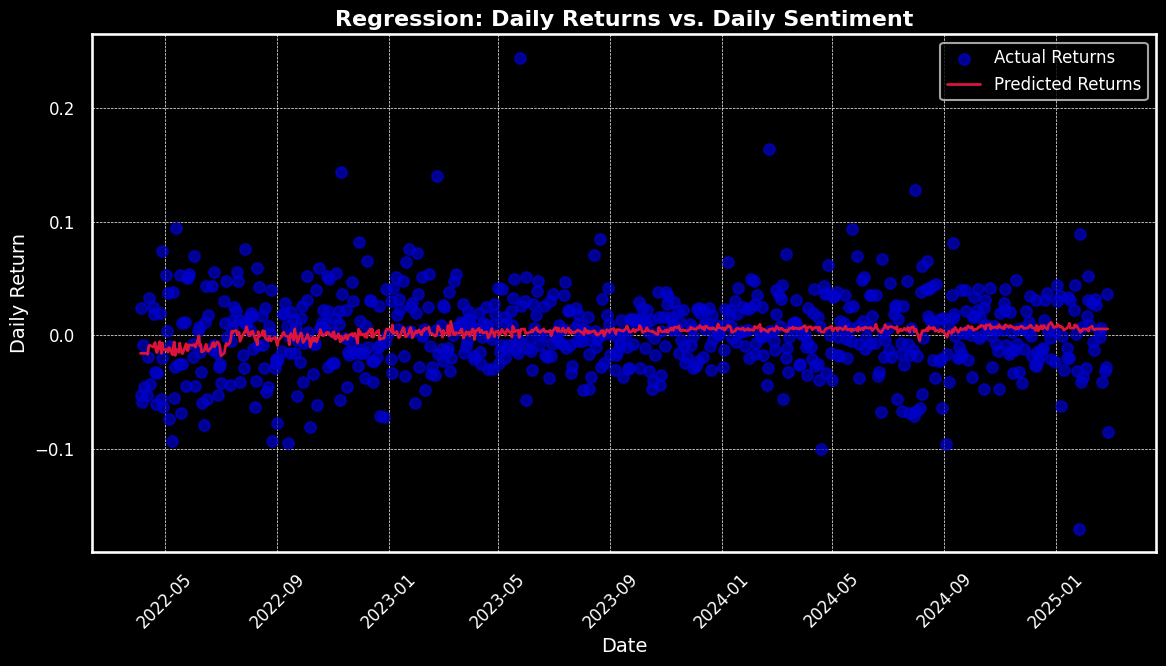

In [ ]:
# Cell 10 – Perform Regression Analysis and Plot Results with Enhanced Visualization

# Prepare features (X) and target (y)
X = merged_df[['daily_sentiment']].values  # Predictor: daily sentiment
y = merged_df['return'].values              # Target: daily stock return

# Build and train the regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Evaluate the model
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Coefficient:", model.coef_[0])
print("Intercept:", model.intercept_)

# Create a visually appealing plot with a refined theme
plt.style.use('dark_background')  # Set a nice theme for the plot
plt.figure(figsize=(12, 7))

# Plot actual returns as a scatter plot
plt.scatter(merged_df['date'], y, color='mediumblue', label='Actual Returns', alpha=0.7, s=60)

# Plot predicted returns as a line plot
plt.plot(merged_df['date'], y_pred, color='crimson', linewidth=2, label='Predicted Returns')

# Enhance plot aesthetics
plt.xlabel("Date", fontsize=14)
plt.ylabel("Daily Return", fontsize=14)
plt.title("Regression: Daily Returns vs. Daily Sentiment", fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()

# Add grid lines for clarity
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


<br>
<hr>
<br>

### You're off and ~~running~~ **API'ing** !

There's no stopping now...

Include in this notebook - below - a short 4-6 sentence summary of
+ Which of your two (or more) stocks offers better "profit" opportunity -- for a single-share -- if you had a time machine that worked for the past 100 days?
+ What other API did you choose to try? What did you analyze from it?
+ How difficult/accessible did you find the Alphavantage documentation?
+ You're welcome to use AI for help + debugging
  + what are your thoughts: &nbsp; Was AI helpful on this?  &nbsp;&nbsp;  Was AI <i>un</i>helpful on this? &nbsp; Both? &nbsp; Neither?
+ Big-picture, how the API'ing and Python'ing went overall?


### Markdown cell for thoughts on this API/JSON/Python "API and Analysis" challenge:

Feel free to use this cell for that reflection...


[REDACTED]

Include in this notebook - below - a short 4-6 sentence summary of
+ Which of your two (or more) stocks offers better "profit" opportunity -- for a single-share -- if you had a time machine that worked for the past 100 days?
  + GOOG had a greater profit opportunity for one share
+ What other API did you choose to try? What did you analyze from it?
  + I used the sentiment API.  I looked at article sentiment mentioning a stock over all history. Ran a regression against stock performance.
+ How difficult/accessible did you find the Alphavantage documentation?
  + The documentation wasn't awesome, but but was clear enough to understand how to parse the json response.
+ You're welcome to use AI for help + debugging
  + what are your thoughts: &nbsp; Was AI helpful on this?  &nbsp;&nbsp;  Was AI <i>un</i>helpful on this? &nbsp; Both? &nbsp; Neither?
    + AI helps accelerate things like parsing json responses and looking for the right information. I'd say its helpful.
+ Big-picture, how the API'ing and Python'ing went overall?
  + It went great!


<hr>

<br>
<br>
<br>
<br>

<hr>

<br>


### Submitting...

This "API + Analysis" challenge will be due:
+ Thursday evening @ 11pm  (Feb. 13th)
+ Download this notebook and Submit to GradeScope
+ Join Econ176 by adding Gradescope course code <tt><b>R7G3NG</b></tt>

Onward!